In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib


matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 18
import os
import subprocess

In [12]:
def read_dat_file(filename):
    params = {}
    
    # Read the .dat file
    with open(filename, 'r') as file:
        for line in file:
            key, value = line.split()
            params[key] = value
    
    # Format the output string
    output_string = (
        f"particle_positions_Dt_{params['Dt']}_Nparticles_{params['Nparticles']}_T_{params['T']}_box_{params['box']}_cutoff_{params['cutoff']}_epsilon_{params['epsilon']}_kspring_{params['kspring']}_lo_{params['lo']}_rate_{params['rate']}_sigma_{params['sigma']}"
    )
    
    return output_string,params


In [7]:
def read_dat_file_OP(filename):
    params = {}
    
    # Read the .dat file
    with open(filename, 'r') as file:
        for line in file:
            key, value = line.split()
            params[key] = value
    
    # Format the output string
    output_string = (
        f"squared_disp_Dt_{params['Dt']}_Nparticles_{params['Nparticles']}_T_{params['T']}_box_{params['box']}_cutoff_{params['cutoff']}_epsilon_{params['epsilon']}_kspring_{params['kspring']}_lo_{params['lo']}_rate_{params['rate']}_sigma_{params['sigma']}"
    )
    
    return output_string

In [17]:

def read_positions(filename,N):
    data= np.loadtxt(filename)
    X = data[:,0]
    Y = data[:,1]
    # Xp = data[:,2]
    # Yp = data[:,3]
    Steps = len(X) //N 
    X = np.reshape(X,(Steps,N))
    Y = np.reshape(Y,(Steps,N))
    return X,Y


In [13]:


file_name,params = read_dat_file('params.dat')
OP_str = read_dat_file_OP('params.dat')
os.makedirs(file_name,exist_ok=True)
# file_name = file_name+'.dat'
# OP_str=OP_str+'.dat'
N=int(params['Nparticles'])
T = int(params['T'])

command = f"mv *{file_name[19:]}.dat {file_name}"
subprocess.run(command,shell=True)

CompletedProcess(args='mv *Dt_0.01_Nparticles_200_T_1000_box_10_cutoff_4_epsilon_1_kspring_4_lo_0.8_rate_20_sigma_0.15.dat particle_positions_Dt_0.01_Nparticles_200_T_1000_box_10_cutoff_4_epsilon_1_kspring_4_lo_0.8_rate_20_sigma_0.15', returncode=0)

In [21]:

# def read_positions(filename,N):
#     data= np.loadtxt(filename)
#     X = data[:,0]
#     Y = data[:,1]
#     Xp = data[:,2]
#     Yp = data[:,3]
#     Steps = len(X) //N 
#     X = np.reshape(X,(Steps,N))
#     Y = np.reshape(Y,(Steps,N))
#     return X,Y,Xp,Yp

X,Y = read_positions(f'{file_name}/'+file_name+'.dat',N)
fig, ax1 = plt.subplots(figsize=(5,5))  
BOX_SIZE = float(params['box'])
max_x = X.max()
max_y = Y.max()
T0 = 300
Tf = T
# x,y = [], []
for time in range(T0,Tf):
    ax1.clear()
    Xnow = X[time]
    Ynow = Y[time]
    # Xnext = X[time+1]
    # Ynext = Y[time+1]
    # Xp_now = Xp[time]
    # Yp_now = Yp[time]
    for posx, posy in zip(Xnow, Ynow):
        # lx= abs(-dx + posx)
        # ly = abs(-dy + posy)
        ax1.add_patch(plt.Circle((posx, posy), radius=0.15, fill=True,color='red'))
        # if lx >= BOX_SIZE/2 or ly >= BOX_SIZE/2:
        #     ax1.plot(posx,posy,lw=0,marker='o',ms=0.01)
        # else:
        #     ax1.plot(np.array([posx,dx]),np.array([posy,dy]))
        
        
        ax1.set_title(f'frame {time}',fontsize=12,loc='left')
        
    ax1.set_xlim(0,BOX_SIZE)
    ax1.set_ylim(0,BOX_SIZE)
    # ax1.set_xticks([0,BOX_SIZE//2, BOX_SIZE])
    # ax1.set_yticks([0,BOX_SIZE//2, BOX_SIZE])
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.set_xlabel(r'$x$')
    ax1.set_ylabel(r'$y$')
    # ax1.set_aspect('equal', adjustable='box')
    plt.tight_layout()
    plt.savefig(f"{file_name}/positions_{time:03d}.png",dpi=200)
plt.close()

command = f"ffmpeg -r 30 -start_number {0} -i '{file_name}/positions_%03d.png' -pix_fmt yuv420p {file_name}/movie_complete.mp4"
subprocess.run(command, shell=True)

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

CompletedProcess(args="ffmpeg -r 30 -start_number 0 -i 'particle_positions_Dt_0.01_Nparticles_200_T_1000_box_10_cutoff_4_epsilon_1_kspring_4_lo_0.8_rate_20_sigma_0.15/positions_%03d.png' -pix_fmt yuv420p particle_positions_Dt_0.01_Nparticles_200_T_1000_box_10_cutoff_4_epsilon_1_kspring_4_lo_0.8_rate_20_sigma_0.15/movie_complete.mp4", returncode=0)

In [20]:
command

"ffmpeg -r 15 -start_number 0 -i 'particle_positions_Dt_0.01_Nparticles_200_T_1000_box_10_cutoff_4_epsilon_1_kspring_4_lo_0.8_rate_20_sigma_0.15/positions_%03d.png' -pix_fmt yuv420p particle_positions_Dt_0.01_Nparticles_200_T_1000_box_10_cutoff_4_epsilon_1_kspring_4_lo_0.8_rate_20_sigma_0.15/movie_only_arrows.mp4"

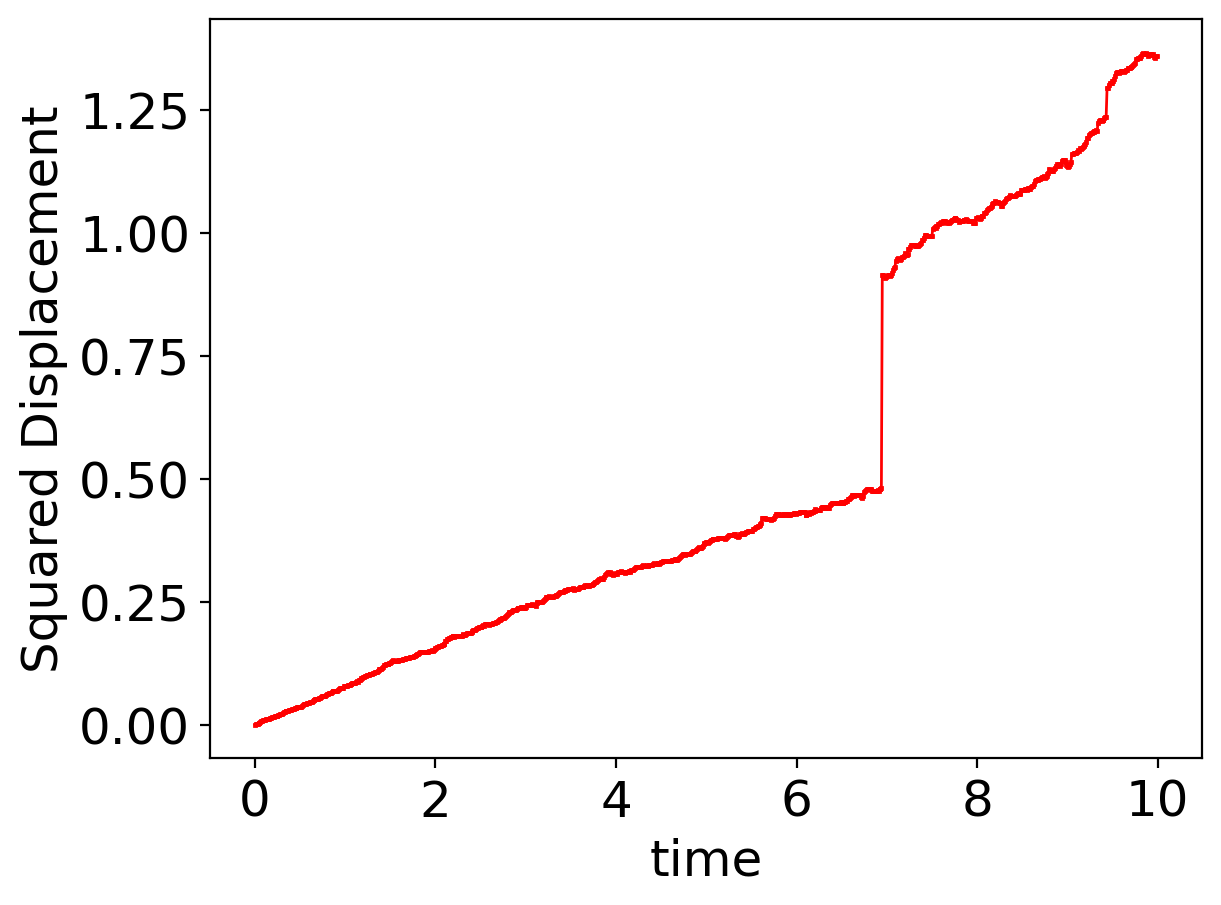

In [20]:

datamsd=np.loadtxt('squared_disp.dat')
time = datamsd[:,0]
sq_p = datamsd[:,1]
fig,ax = plt.subplots(dpi=200)

ax.plot(time,sq_p, lw=0.99, marker='s', mfc ='none', color='red',markersize=1)
ax.set_xlabel('time')
ax.set_ylabel('Squared Displacement')
# ax.legend()
# ax.loglog()
# ax.set_ylim((0,2.5))
plt.savefig(f'squared_displacement_N_{N}_wpersistence.png',dpi=200)
plt.show()

0.05002116050000003

In [59]:
len(X[:,0])

100